In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
# Read in provider table

data = pd.read_csv('../../../processed_data/provider_final.csv',index_col='Provider')
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.shape)
data.sample(5)

(5410, 46)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV53243,No,4.0,4.0,0.0,0.969697,Both,7.0,6.800000,6.0,74.0,71.040000,9.0,53.0,1.0,2.0,1.0,1490.133333,5.0,1.0,0.111111,yes,2.0,yes,2.0,yes,2.0,yes,34.0,0.515152,yes,52.0,yes,2496.0,yes,372.0,yes,1.33,61,75,1.23,121412,1990.36,1,8,69,1.19
PRV56833,No,0.0,0.0,0.0,0.000000,OP,6.0,6.500000,9.0,70.5,74.000000,0.0,7.0,0.0,1.0,1.0,88.750000,1.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,2.0,0.250000,yes,32.0,yes,89.0,yes,91.0,yes,0.00,7,8,1.14,710,101.43,0,0,8,1.00
PRV53126,No,0.0,0.0,0.0,3.911765,OP,6.5,6.647059,4.0,77.0,77.205882,0.0,25.0,0.0,2.0,1.0,347.647059,1.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,17.0,0.500000,yes,52.0,yes,2404.0,yes,371.0,yes,3.91,25,34,1.36,11900,476.00,0,4,34,1.03
PRV54309,No,0.0,0.0,0.0,2.413793,OP,6.0,6.413793,5.0,76.0,75.000000,0.0,18.0,0.0,1.0,1.0,212.413793,1.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,11.0,0.379310,yes,50.0,yes,550.0,yes,335.0,yes,2.41,18,29,1.61,6380,354.44,0,3,29,1.04
PRV54434,No,18.0,18.0,0.0,0.700000,Both,6.0,6.047619,6.0,77.0,75.357143,2.0,29.0,1.0,1.0,1.0,686.428571,2.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,13.0,0.325000,yes,52.0,yes,2377.0,yes,372.0,yes,1.52,31,42,1.35,31136,1004.39,0,2,42,1.05


In [3]:
# Make dummies

encode_cols = data[~data.applymap(np.isreal)].dropna(axis=1).columns.to_list()
print(encode_cols)

data[encode_cols[2:]] = data[encode_cols[2:]].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
dummies = pd.get_dummies(data['Serves'],prefix='Serves_',drop_first=True)

data_dum = pd.concat([data.drop('Serves',axis=1),dummies],axis=1)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

['PotentialFraud', 'Serves', 'DupClaim_IP', 'DupClaimMultiState_IP', 'DupClaimMultiProvider_IP', 'DupClaimMultiStartDt_IP', 'DupClaim_OP', 'DupClaimMultiState_OP', 'DupClaimMultiProvider_OP', 'DupClaimMultiStartDt_OP']


In [4]:
print(data_dum.shape)
data_dum.head()

(5410, 47)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves__IP,Serves__OP
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,No,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,77.880000,5.0,19.0,1.0,1.0,1.0,4185.600000,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,11.0,0.550000,1,50.0,1,422.0,1,278.0,1,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09,0,0
PRV51003,Yes,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,69.083333,53.0,66.0,3.0,3.0,1.0,4588.409091,25.0,1.0,0.016129,1,2.0,1,2.0,1,2.0,1,25.0,0.357143,1,52.0,1,1351.0,1,372.0,1,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19,0,0
PRV51004,No,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,71.261745,0.0,138.0,0.0,9.0,1.0,350.134228,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,72.0,0.483221,1,52.0,1,3006.0,1,375.0,1,1.43,138,149,1.08,52480,380.29,0,12,149,1.27,0,1
PRV51005,Yes,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,69.526180,0.0,495.0,0.0,4.0,1.0,241.124464,25.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,530.0,0.454936,1,52.0,1,3920.0,1,382.0,1,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27,0,1
PRV51007,No,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,68.305556,3.0,56.0,1.0,2.0,1.0,468.194444,3.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,29.0,0.420290,1,52.0,1,1816.0,1,371.0,1,0.96,58,72,1.24,36974,637.48,0,8,71,1.06,0,0


In [5]:
# Drop Means

# data_dum.drop(['DurationMeanIP',
#                'DurationMeanOP',
#                'ChronCondsMean',
#                'PtAgeMean'], axis=1, inplace=True)

In [6]:
# Drop Medians

# data_dum.drop(['DurationMedianIP',
#                'DurationMedianOP',
#                'ChronCondsMedian',
#                'PtAgeMedian'], axis=1, inplace=True)

In [7]:
# Drop Duration Mean IP

# data_dum.drop(['DurationMeanIP'], axis=1, inplace=True)

In [8]:
# Drop Duration Median IP

data_dum.drop(['DurationMedianIP'], axis=1, inplace=True)

# Logistic Regression

In [9]:
# Make target and features, and tt-split

data_dum2 = data_dum.copy()
data_dum2['PotentialFraud'] = np.where(data_dum2['PotentialFraud']=='Yes', 1, 0)

y = data_dum2.iloc[:, 0]
X = data_dum2.iloc[:, 1:]

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [10]:
print(ytrain.mean())
ytest.mean()

0.09347768682334301


0.09365372766481823

In [11]:
# Standardizing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)
Xstrain = ss.transform(Xtrain)

## Based on F1 Score

In [12]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

In [13]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg = GridSearchCV(logreg, grid_logreg, scoring='f1', cv=5, n_jobs=-1)
%time grid_search_logreg.fit(Xstrain, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.49 s, sys: 64.8 ms, total: 1.56 s
Wall time: 8.99 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [14]:
# grid_search_logreg.cv_results_

In [15]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg.best_params_))
print('Best F1   Score:\t%.4f' %grid_search_logreg.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 10, 'penalty': 'l1'}
Best F1   Score:	0.5542
Train error:		0.12200

Confusion Matrix:
[[3019  414]
 [  48  306]]


In [16]:
cm = confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.864406779661017

Precision:
0.425

Accuracy:
0.878003696857671


In [17]:
labels = np.unique(ytrain)
cm = confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xtrain), labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
display(cm_df)

,0,1
0,0,3433
1,0,354


In [18]:
# Feature Importance

f1_coef = pd.DataFrame(grid_search_logreg.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
f1_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
f1_coef_imp = f1_coef_abs[f1_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", f1_coef_abs.shape[0])
print(f"number of predictors after Lasso:", f1_coef_imp.shape[0])

display(f1_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 41


,abs_coef,coef
DupClaimStartDtNum_IP,5.377970,-5.377970
TotalRev,4.719609,4.719609
NumPtsIP,3.521863,-3.521863
DupClaimNum_IP,2.928758,2.928758
NumPtsOP,2.364676,-2.364676
DupClaimProviderNum_IP,1.589766,1.589766
NumOfClm,1.319164,1.319164
ClmPerDt,1.018525,1.018525
DupClaimStatesNum_OP,0.933477,0.933477
NumTopCodeClaim,0.926193,0.926193


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by F1')]

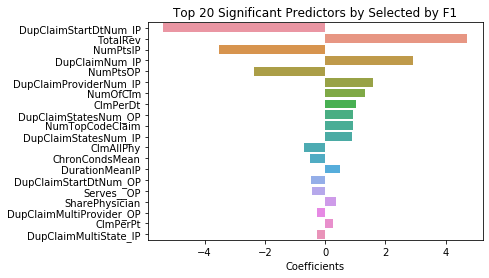

In [19]:
# Plot of Most Significant Coefs

plot_df = f1_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by F1")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on roc_auc Score

In [20]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(class_weight='balanced')

In [21]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg2 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg2 = GridSearchCV(logreg2, grid_logreg2, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_logreg2.fit(Xstrain, ytrain)

CPU times: user 193 ms, sys: 7.36 ms, total: 200 ms
Wall time: 14 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [22]:
# grid_search_logreg.cv_results_

In [23]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg2.best_params_))
print('Best roc_auc Score:\t%.4f' %grid_search_logreg2.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg2.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg2.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.1, 'penalty': 'l1'}
Best roc_auc Score:	0.9374
Train error:		0.13414

Confusion Matrix:
[[2969  464]
 [  44  310]]


In [24]:
cm = confusion_matrix(ytrain, grid_search_logreg2.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8757062146892656

Precision:
0.4005167958656331

Accuracy:
0.8658568787958807


In [25]:
# Feature Importance

roc_coef = pd.DataFrame(grid_search_logreg2.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
roc_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg2.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg2.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
roc_coef_imp = roc_coef_abs[roc_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", roc_coef_abs.shape[0])
print(f"number of predictors after Lasso:", roc_coef_imp.shape[0])

display(roc_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 20


,abs_coef,coef
TotalRev,1.587830,1.587830
DurationMeanIP,0.637415,0.637415
NumOfPt,0.587109,-0.587109
DupClaimNum_OP,0.540680,0.540680
ClmPerDt,0.432130,0.432130
RevPerPt,0.386211,0.386211
ClmPerPt,0.375853,0.375853
DupClaimStartDtNum_IP,0.313870,-0.313870
DupClaim_IP,0.249099,0.249099
ChronCondsMean,0.247023,-0.247023


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by ROC_AUC')]

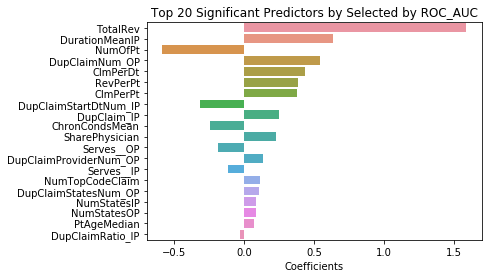

In [26]:
# Plot of Most Significant Coefs

plot_df = roc_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by ROC_AUC")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on Recall Score

In [27]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(class_weight='balanced')

In [28]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg3 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg3 = GridSearchCV(logreg3, grid_logreg3, scoring='recall', cv=5, n_jobs=-1)
%time grid_search_logreg3.fit(Xstrain, ytrain)

CPU times: user 84.2 ms, sys: 7.95 ms, total: 92.2 ms
Wall time: 13.5 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [29]:
# grid_search_logreg.cv_results_

In [30]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg3.best_params_))
print('Best Recall Score:\t%.4f' %grid_search_logreg3.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg3.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg3.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.01, 'penalty': 'l1'}
Best Recall Score:	0.8814
Train error:		0.14286

Confusion Matrix:
[[2930  503]
 [  38  316]]


In [31]:
cm = confusion_matrix(ytrain, grid_search_logreg3.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8926553672316384

Precision:
0.38583638583638585

Accuracy:
0.8571428571428571


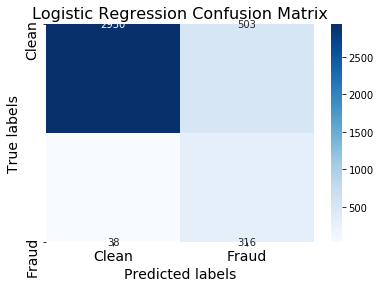

In [32]:
%matplotlib inline

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Logistic Regression Confusion Matrix', fontsize=16)
ax.xaxis.set_ticklabels(['Clean','Fraud'], fontsize=14)
ax.yaxis.set_ticklabels(['Clean','Fraud'], fontsize=14)
plt.show()


# # ax = plt.subplot()
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.set_xlabel('Predicted labels')
# plt.set_ylabel('True labels')
# plt.set_title('Logistic Regression Confusion Matrix', fontsize=16)
# plt.xaxis.set_ticklabels(['Clean','Fraud', ], fontsize=14)
# plt.yaxis.set_ticklabels(['Clean','Fraud',], fontsize=14)

In [33]:
# Feature Importance

recall_coef = pd.DataFrame(grid_search_logreg3.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
recall_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg3.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg3.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
recall_coef_imp = recall_coef_abs[recall_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", recall_coef_abs.shape[0])
print(f"number of predictors after Lasso:", recall_coef_imp.shape[0])

display(recall_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 9


,abs_coef,coef
TotalRev,1.139868,1.139868
DurationMeanIP,0.551018,0.551018
NumTopCodeClaim,0.266651,0.266651
ClmPerPt,0.202903,0.202903
NumOfClm,0.180472,0.180472
RevPerPt,0.100109,0.100109
DupClaim_IP,0.066114,0.066114
Serves__OP,0.024752,-0.024752
NumStatesIP,0.021705,0.021705
NumPtsIP,0.000000,0.000000


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Penalized Logistic Regression Coefficients')]

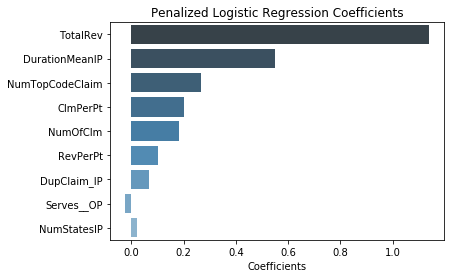

In [48]:
# Plot of Most Significant Coefs

plot_df = recall_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df, palette=sns.color_palette('Blues_d', n_colors=10))
ax.set(xlabel = "Coefficients", title = "Penalized Logistic Regression Coefficients")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on Accuracy Score

In [35]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg4 = LogisticRegression(class_weight='balanced')

In [36]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg4 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg4 = GridSearchCV(logreg4, grid_logreg4, scoring='recall', cv=5, n_jobs=-1)
%time grid_search_logreg4.fit(Xstrain, ytrain)

CPU times: user 76.7 ms, sys: 6.21 ms, total: 82.9 ms
Wall time: 15 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [37]:
# grid_search_logreg.cv_results_

In [38]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg4.best_params_))
print('Best Accuracy Score:\t%.4f' %grid_search_logreg4.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg4.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg4.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.01, 'penalty': 'l1'}
Best Accuracy Score:	0.8814
Train error:		0.14286

Confusion Matrix:
[[2930  503]
 [  38  316]]


In [39]:
cm = confusion_matrix(ytrain, grid_search_logreg4.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8926553672316384

Precision:
0.38583638583638585

Accuracy:
0.8571428571428571


In [40]:
# Feature Importance

acc_coef = pd.DataFrame(grid_search_logreg4.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
acc_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg4.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg4.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
acc_coef_imp = acc_coef_abs[acc_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", acc_coef_abs.shape[0])
print(f"number of predictors after Lasso:", acc_coef_imp.shape[0])

display(acc_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 9


,abs_coef,coef
TotalRev,1.142544,1.142544
DurationMeanIP,0.550005,0.550005
NumTopCodeClaim,0.263743,0.263743
ClmPerPt,0.202896,0.202896
NumOfClm,0.181125,0.181125
RevPerPt,0.099972,0.099972
DupClaim_IP,0.065983,0.065983
Serves__OP,0.026125,-0.026125
NumStatesIP,0.021375,0.021375
NumPtsIP,0.000000,0.000000


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by Accuracy')]

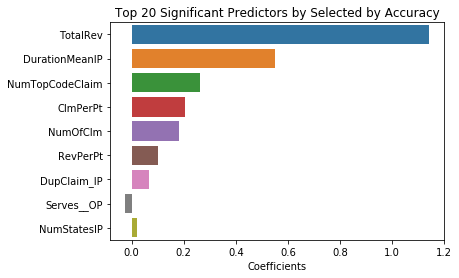

In [41]:
# Plot of Most Significant Coefs

plot_df = acc_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by Accuracy")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

# Test

In [42]:
# Standardize

ss_t = StandardScaler()
ss_t.fit(Xtest)
Xstest = ss_t.transform(Xtest)

In [44]:
cm_t = confusion_matrix(ytest, grid_search_logreg3.best_estimator_.predict(Xstest))
print(cm_t)

print('\nRecall:')
print(cm_t[1][1] / (cm_t[1][1]+cm_t[1][0]))
print('\nPrecision:')
print(cm_t[1][1] / (cm_t[1][1]+cm_t[0][1]))
print('\nAccuracy:')
print((cm_t[0][0]+cm_t[1][1]) / (cm_t[0][1]+cm_t[1][0]+cm_t[0][0]+cm_t[1][1]))

[[1285  186]
 [  16  136]]

Recall:
0.8947368421052632

Precision:
0.422360248447205

Accuracy:
0.8755391250770179
